## OLS fit

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
tips = sns.load_dataset("tips")

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/usr/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


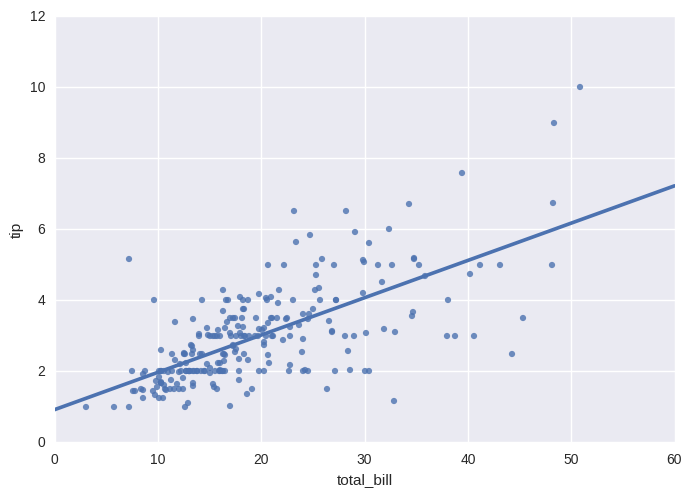

In [5]:
ax = sns.regplot(x="total_bill", y="tip", data=tips, ci=None)

In [6]:
X = tips.total_bill.reshape(244,1)
y = tips.tip.reshape(244,1)

In [7]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
print lm.intercept_
print lm.coef_

[ 0.92026961]
[[ 0.10502452]]


In [9]:
X = tips[['total_bill', 'size']]

In [10]:
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
print lm.intercept_
print lm.coef_

[ 0.66894474]
[[ 0.09271334  0.19259779]]


### Регрессия и её показатели

In [27]:
from sklearn.datasets import load_boston
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import numpy as np

boston = load_boston()


boston_data=pd.DataFrame(boston.data)
boston_data.columns = boston.feature_names
boston_data["PRICE"]=boston.target

In [28]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [29]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [35]:
formula = 'PRICE ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + LSTAT'

lm = smf.ols(formula=formula, data=boston_data).fit()

In [36]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     108.4
Date:                Thu, 10 Nov 2016   Prob (F-statistic):          5.08e-124
Time:                        23:07:40   Log-Likelihood:                -1529.6
No. Observations:                 506   AIC:                             3083.
Df Residuals:                     494   BIC:                             3134.
Df Model:                          11                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     19.3629      3.990      4.853      0.000        11.524    27.202
CRIM          -0.1134      0.034     -3.290      0.001        -0.181    -0.046
ZN             0.0775      0.014      5.602      0.000         0.050     0.105
INDUS         -0.0430      0.065     -0.666      0.506        -0.170     0.084
CHAS           3.4139      0.909      3.757      0.000         1.628     5.199
NOX           -9.6839      3.810     -2.542      0.011       -17.169    -2.199
RM             4.1405      0.435      9.520      0.000         3.286     4.995
AGE           -0.0039      0.014     -0.281      0.779        -0.031     0.023
DIS           -1.6231      0.211     -7.707      0.000        -2.037    -1.209
RAD            0.1993      0.069      2.892      0.004         0.064     0.335
TAX           -0.0147      0.004     -3.695      0.000        -0.023    -0.007
LSTAT         -0.5680      0.053    -10.707      0.000        -0.672    -0.464
==============================================================================
Omnibus:                      155.650   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              566.055
Skew:                           1.380   Prob(JB):                    1.21e-123
Kurtosis:                       7.385   Cond. No.                     9.46e+03
==============================================================================

Warnings:
[1] The condition number is large, 9.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Давайте разберем некоторые выведенные показатели

### R квадрат

 В общем случае, статистика  $R^2$ (её еще называют коэффициентом детерминации) имеет вид:

$$ R^2 = 1- \frac{SS_{res}}{SS_{tot}} $$

, где:

$SS_{tot}=\sum_{i}(y_i-\bar{y})^2$

$SS_{res}=\sum_{i}(f_i-\bar{y})^2$

![title](CoD1.png)

$R^2$ демонстрирует объясняющую способность модели

 Для моделей полученных методом OLS выполняется правило: $$R^2 = \frac{SS_{explained}}{SS_{total}}$$

Для модели, удовлетворяющей следующим требованиям:

1. Получена методом OLS
2. Включает свободный член

$R^2$ равен квадрату коэффициента корреляции $r$ между $Y$ и $Y_{pred}$. Если в регрессии одна объясняющая переменная $X$, $R^2$ равен квадрату коэффициента корреляции между $Y$ и $X$

## F-test на значимость регрессии

Как и для других выборочных показателей, для проверки значений $R^2$ существуют статистические тесты. В данном случае мы будем использовать F-test, со следующей нулевой гипотезой

$$H_0: b_1=b_2=...=b_n=0$$

F-статистика рассчитывается следующим образом:

$$ F=\frac{(SS_{tot}-SS_{res})/(k-1)}{SS_{res}/(n-k)}$$

где n-число наблюдений, k-число объясняющих переменных в модели

С увеличением количества регрессоров $R^2$ не убывает. Поэтому для оценки качества модели используется коэффициенты $R^2_{adj}$ и $R^2_{pred}$

### $R^2_{adj}$

Общая идея состоит в том, чтобы править значение коэффициента $R^2$ на количество регрессоров. Существует большое количестов вариантов исправления. Один из наиболее часто использующихся выглядит так:

$$R^2_{adj}= 1- (1-R^2)\frac{n-1}{n-k}$$

где $n$ - объем выборки, $k$ - количество объясняющих переменных

## $R^2_{pred}$

Предсказательное значение $R^2$ получается за счет leave-one-out кросс-валидации:

## Тесты на значимость коэффициентов регрессии

Кроме одновременной проверки значимости всех коэффициентов, можно проверять на значимость и отдельные коэффициенты. Для этого используется t-test. При проверке нескольких коэффициентов возникает проблема множественных сравнений. T-статистика выглядит следующим образом:

$$ T_{n-k-1}= \frac{b}{s_b},$$

$$ s_b= \sqrt{\frac{1-R^2_{YH}}{(1-R^2_{X_kG_k})(N-K-1)}}*\frac{s_y}{s_{X_k}}$$

, где $R^2_{X_kG_k}$ - $R^2$ для регрессии $X_k$ на все остальные объясняющие переменные

С ростом $R^2_{X_kG_k}$ стандартные ошибки растут, и мощность теста падает. Этот эффект является следствием мультиколлинеарности

Для каждой переменной можно рассчитать Variance Inflation Factor:  $$VIF=\frac{1}{1-R^2_{X_kG_k}}$$

Для случая с одной объясняющей переменной $T^2=F$